In [12]:
import pandas as pd
import os
import ast

# Set the folder where your CSV files are located
FOLDER_PATH = r'/Users/deepeshnavaneethakrishnan/Desktop/energy7/general/combined-data'  # 🔁 Change this to your actual folder

# Columns that contain stringified lists
LIST_COLUMNS = ['A Current', 'A Voltage', 'B Current', 'B Voltage']

# Empty list to collect DataFrames
all_dataframes = []

# Loop over all CSV files in the folder
for file in os.listdir(FOLDER_PATH):
    if file.endswith('.csv'):
        file_path = os.path.join(FOLDER_PATH, file)
        df = pd.read_csv(file_path)
        
        # Add column to identify source file
        df['SourceFile'] = file
        
        # Parse list-like columns
        for col in LIST_COLUMNS:
            if col in df.columns:
                df[col] = df[col].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
        
        all_dataframes.append(df)

# Combine all into a single DataFrame
combined_df = pd.concat(all_dataframes, ignore_index=True)

# Optional: Preview result
print(f"Combined dataset shape: {combined_df.shape}")
print(combined_df[['SourceFile', 'Point Machine Name']].head())


Combined dataset shape: (31956, 13)
     SourceFile Point Machine Name
0  NFR2_TWS.csv         PT-101/102
1  NFR2_TWS.csv         PT-101/102
2  NFR2_TWS.csv         PT-101/102
3  NFR2_TWS.csv         PT-101/102
4  NFR2_TWS.csv         PT-101/102


In [13]:
combined_df.head()

,Time,Site Name,Point Machine Name,Direction,A Current,A Voltage,B Current,B Voltage,Type of A,Type of B,Polling of A,Polling of B,SourceFile
0,10-08-2024 6.19,NALBARI,PT-101/102,Reverse,"[0.0, 3.5, 3.8, 3.1, 2.5, 2.1, 1.9, 1.8, 1.9, ...","[0.0, 18.0, 40.5, 73.5, 90.0, 97.5, 102.0, 103...","[0.0, 4.3, 4.1, 3.3, 2.7, 2.3, 2.0, 2.1, 2.2, ...","[0.0, 18.0, 25.5, 64.5, 85.5, 96.0, 100.5, 103...",TWS,TWS,100,100,NFR2_TWS.csv
1,10-08-2024 6.20,NALBARI,PT-101/102,Normal,"[0.0, 3.0, 3.8, 3.0, 2.5, 2.1, 1.8, 1.7, 1.6, ...","[0.0, 49.5, 78.0, 93.0, 102.0, 106.5, 108.0, 1...","[0.0, 4.1, 3.9, 3.1, 2.5, 2.1, 1.8, 1.7, 1.7, ...","[0.0, 48.0, 76.5, 91.5, 100.5, 105.0, 108.0, 1...",TWS,TWS,100,100,NFR2_TWS.csv
2,10-08-2024 21.45,NALBARI,PT-101/102,Normal,"[0.0, 3.7, 3.6, 2.9, 2.4, 2.0, 1.8, 1.6, 1.6, ...","[0.0, 27.0, 63.0, 85.5, 97.5, 103.5, 106.5, 10...","[0.0, 1.1, 4.2, 3.7, 2.9, 2.4, 2.0, 1.8, 1.7, ...","[0.0, 25.5, 61.5, 84.0, 96.0, 103.5, 106.5, 10...",TWS,TWS,100,100,NFR2_TWS.csv
3,12-08-2024 10.29,NALBARI,PT-101/102,Reverse,"[0.0, 3.4, 3.9, 3.1, 2.6, 2.2, 1.9, 1.8, 1.9, ...","[0.0, 12.0, 54.0, 79.5, 94.5, 102.0, 105.0, 10...","[0.0, 4.2, 4.2, 3.4, 2.7, 2.3, 2.0, 2.0, 2.2, ...","[0.0, 12.0, 51.0, 78.0, 93.0, 100.5, 105.0, 10...",TWS,TWS,100,100,NFR2_TWS.csv
4,12-08-2024 10.43,NALBARI,PT-101/102,Normal,"[0.0, 1.8, 3.9, 3.2, 2.6, 2.2, 1.9, 1.7, 1.7, ...","[0.0, 37.5, 70.5, 90.0, 99.0, 105.0, 108.0, 10...","[0.0, 3.1, 4.1, 3.3, 2.6, 2.2, 1.9, 1.8, 1.9, ...","[0.0, 36.0, 69.0, 88.5, 99.0, 105.0, 108.0, 10...",TWS,TWS,100,100,NFR2_TWS.csv


In [14]:
combined_df.shape

(31956, 13)

In [15]:
combined_df.to_csv('combined_dataset.csv', index=False)
print("saved")

saved


In [19]:
import pandas as pd
import ast

# 🔁 CHANGE THIS to your file path
CSV_FILE_PATH = r'/Users/deepeshnavaneethakrishnan/Desktop/energy7/general/combined-data/combined_dataset.csv'  # e.g., 'data/PT77.csv'

# List of columns that contain stringified lists
LIST_COLUMNS = ['A Current', 'A Voltage', 'B Current', 'B Voltage']

# Load the CSV
df = pd.read_csv(CSV_FILE_PATH)

# Convert 'Time' column to datetime format
if 'Time' in df.columns:
    df['Time'] = pd.to_datetime(df['Time'], dayfirst=True, errors='coerce')

# Convert stringified lists to list[float] for each signal column
for col in LIST_COLUMNS:
    if col in df.columns:
        df[col] = df[col].apply(
            lambda x: [float(i) for i in ast.literal_eval(x)] if isinstance(x, str) else x
        )

# Print column data types
print("\n✅ Data Types After Cleaning:\n")
print(df.dtypes)

# Preview one cleaned row (just the signals)
print("\n🧪 Sample Cleaned Signal Values (Row 0):\n")
print(df[LIST_COLUMNS].iloc[0])


/var/folders/5n/xzc0vnt56rvbflw_5ld8twv40000gn/T/ipykernel_25056/2484077358.py:15: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Time'] = pd.to_datetime(df['Time'], dayfirst=True, errors='coerce')



✅ Data Types After Cleaning:

Time                  datetime64[ns]
Site Name                     object
Point Machine Name            object
Direction                     object
A Current                     object
A Voltage                     object
B Current                     object
B Voltage                     object
Type of A                     object
Type of B                     object
Polling of A                   int64
Polling of B                   int64
SourceFile                    object
dtype: object

🧪 Sample Cleaned Signal Values (Row 0):

A Current    [0.0, 3.5, 3.8, 3.1, 2.5, 2.1, 1.9, 1.8, 1.9, ...
A Voltage    [0.0, 18.0, 40.5, 73.5, 90.0, 97.5, 102.0, 103...
B Current    [0.0, 4.3, 4.1, 3.3, 2.7, 2.3, 2.0, 2.1, 2.2, ...
B Voltage    [0.0, 18.0, 25.5, 64.5, 85.5, 96.0, 100.5, 103...
Name: 0, dtype: object


In [20]:
df['List Length'] = df['A Current'].apply(len)
print(df['List Length'].value_counts())


List Length
32     2806
33     2656
31     2568
34     1886
30     1880
       ... 
392       1
213       1
265       1
681       1
83        1
Name: count, Length: 277, dtype: int64


In [21]:
# Calculate mean and std of A Current per machine
df['A Current Mean'] = df['A Current'].apply(lambda x: sum(x)/len(x) if x else 0)
summary = df.groupby('Point Machine Name')['A Current Mean'].describe()
print(summary)


                     count      mean       std       min       25%       50%  \
Point Machine Name                                                             
PT 101/102            34.0  2.739276  1.336177  0.000000  2.409006  2.576011   
PT 103/104            60.0  2.786309  0.707997  0.000000  2.636106  2.810206   
PT 105/106            31.0  2.535769  0.823726  0.000000  2.366447  2.539080   
PT 107/108           193.0  2.444227  1.601568  0.000000  2.215278  2.367532   
PT 109/110           155.0  2.511359  0.362276  0.000000  2.414365  2.570122   
PT 133/134           168.0  2.245263  0.517353  0.000000  1.935573  2.441256   
PT 135/136           163.0  2.196385  0.500692  0.000000  1.950194  2.332911   
PT-101/102           512.0  2.178180  0.274273  0.000000  2.055000  2.148109   
PT-107/108          1091.0  2.167334  0.450317  0.000000  1.805882  2.019444   
PT-109/110          2953.0  2.050345  0.210318  0.000000  1.972222  2.040541   
PT-121/122          3516.0  2.419372  0.

In [22]:
from sklearn.preprocessing import StandardScaler

# Copy to preserve original data
normalized_df = df.copy()
list_columns = ['A Current', 'A Voltage', 'B Current', 'B Voltage']

# Loop through each unique point machine
for machine in normalized_df['Point Machine Name'].unique():
    mask = normalized_df['Point Machine Name'] == machine
    
    for col in list_columns:
        normalized_df.loc[mask, col] = normalized_df.loc[mask, col].apply(
            lambda lst: list(StandardScaler().fit_transform([[v] for v in lst]).flatten())
            if isinstance(lst, list) and len(lst) > 1 else lst
        )


In [23]:
from scipy.stats import skew, kurtosis
import numpy as np

def extract_features(row):
    features = {}
    for col in ['A Current', 'A Voltage', 'B Current', 'B Voltage']:
        signal = row[col]
        if isinstance(signal, list) and len(signal) > 1:
            features[f'{col}_mean'] = np.mean(signal)
            features[f'{col}_std'] = np.std(signal)
            features[f'{col}_min'] = np.min(signal)
            features[f'{col}_max'] = np.max(signal)
            features[f'{col}_skew'] = skew(signal)
            features[f'{col}_kurtosis'] = kurtosis(signal)
            features[f'{col}_energy'] = np.sum(np.square(signal))
        else:
            # Handle empty or invalid lists
            features[f'{col}_mean'] = 0
            features[f'{col}_std'] = 0
            features[f'{col}_min'] = 0
            features[f'{col}_max'] = 0
            features[f'{col}_skew'] = 0
            features[f'{col}_kurtosis'] = 0
            features[f'{col}_energy'] = 0
    return pd.Series(features)

# Apply feature extraction
feature_df = df.apply(extract_features, axis=1)

# Optional: attach machine and time info for later use
feature_df['Point Machine Name'] = df['Point Machine Name']
feature_df['Time'] = df['Time']


In [24]:
feature_df.head()

,A Current_mean,A Current_std,A Current_min,A Current_max,A Current_skew,A Current_kurtosis,A Current_energy,A Voltage_mean,A Voltage_std,A Voltage_min,...,B Current_energy,B Voltage_mean,B Voltage_std,B Voltage_min,B Voltage_max,B Voltage_skew,B Voltage_kurtosis,B Voltage_energy,Point Machine Name,Time
0,2.395349,1.041455,0.0,3.8,-0.985356,0.323788,293.36,80.178571,35.454502,0.0,...,305.75,78.923077,35.006508,0.0,103.5,-1.452700,0.398613,290718.00,PT-101/102,NaT
1,2.055000,0.851455,0.0,3.8,-1.085704,1.098002,197.92,102.644531,31.987678,0.0,...,223.24,102.679688,32.064616,0.0,118.5,-2.278847,3.789869,1481121.00,PT-101/102,NaT
2,2.048780,0.893096,0.0,3.7,-0.948918,0.583718,204.80,102.197674,32.421666,0.0,...,211.25,102.337209,32.496283,0.0,118.5,-2.223945,3.503360,1487229.75,PT-101/102,NaT
3,2.418605,1.036150,0.0,3.9,-0.981915,0.428924,297.70,100.903846,32.964205,0.0,...,606.87,99.565385,32.811313,0.0,118.5,-2.034802,2.877796,1428680.25,PT-101/102,NaT
4,2.140476,0.885077,0.0,3.9,-1.068229,0.951268,225.33,101.988462,32.276418,0.0,...,478.20,100.661538,32.164016,0.0,118.5,-2.135131,3.295805,1451745.00,PT-101/102,NaT


In [25]:
print("\n🔍 Missing values check:")
print(feature_df.isnull().sum())

print("\n♾️ Infinite values check:")
print(np.isinf(feature_df.select_dtypes(include=[np.number])).sum())



🔍 Missing values check:
A Current_mean            0
A Current_std             0
A Current_min             0
A Current_max             0
A Current_skew           35
A Current_kurtosis       35
A Current_energy          0
A Voltage_mean            0
A Voltage_std             0
A Voltage_min             0
A Voltage_max             0
A Voltage_skew           13
A Voltage_kurtosis       13
A Voltage_energy          0
B Current_mean            0
B Current_std             0
B Current_min             0
B Current_max             0
B Current_skew           36
B Current_kurtosis       36
B Current_energy          0
B Voltage_mean            0
B Voltage_std             0
B Voltage_min             0
B Voltage_max             0
B Voltage_skew            9
B Voltage_kurtosis        9
B Voltage_energy          0
Point Machine Name        0
Time                  31956
dtype: int64

♾️ Infinite values check:
A Current_mean        0
A Current_std         0
A Current_min         0
A Current_max         0

In [27]:
# Step 1: Drop rows with any NaNs in skew/kurtosis columns
columns_to_check = [col for col in feature_df.columns if 'skew' in col or 'kurtosis' in col]
feature_df_cleaned = feature_df.dropna(subset=columns_to_check)

# Step 2: Drop the 'Time' column
feature_df_cleaned.drop(columns=['Time'], inplace=True)
feature_df_cleaned.head()


/var/folders/5n/xzc0vnt56rvbflw_5ld8twv40000gn/T/ipykernel_25056/769071180.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feature_df_cleaned.drop(columns=['Time'], inplace=True)


,A Current_mean,A Current_std,A Current_min,A Current_max,A Current_skew,A Current_kurtosis,A Current_energy,A Voltage_mean,A Voltage_std,A Voltage_min,...,B Current_kurtosis,B Current_energy,B Voltage_mean,B Voltage_std,B Voltage_min,B Voltage_max,B Voltage_skew,B Voltage_kurtosis,B Voltage_energy,Point Machine Name
0,2.395349,1.041455,0.0,3.8,-0.985356,0.323788,293.36,80.178571,35.454502,0.0,...,0.522739,305.75,78.923077,35.006508,0.0,103.5,-1.452700,0.398613,290718.00,PT-101/102
1,2.055000,0.851455,0.0,3.8,-1.085704,1.098002,197.92,102.644531,31.987678,0.0,...,0.498377,223.24,102.679688,32.064616,0.0,118.5,-2.278847,3.789869,1481121.00,PT-101/102
2,2.048780,0.893096,0.0,3.7,-0.948918,0.583718,204.80,102.197674,32.421666,0.0,...,0.520934,211.25,102.337209,32.496283,0.0,118.5,-2.223945,3.503360,1487229.75,PT-101/102
3,2.418605,1.036150,0.0,3.9,-0.981915,0.428924,297.70,100.903846,32.964205,0.0,...,-0.300519,606.87,99.565385,32.811313,0.0,118.5,-2.034802,2.877796,1428680.25,PT-101/102
4,2.140476,0.885077,0.0,3.9,-1.068229,0.951268,225.33,101.988462,32.276418,0.0,...,-0.223773,478.20,100.661538,32.164016,0.0,118.5,-2.135131,3.295805,1451745.00,PT-101/102


In [28]:
print("✅ Final shape:", feature_df_cleaned.shape)
print("❌ Remaining NaNs:", feature_df_cleaned.isnull().sum().sum())


✅ Final shape: (31890, 29)
❌ Remaining NaNs: 0


In [29]:
zero_variance_cols = feature_df_cleaned.loc[:, feature_df_cleaned.nunique() <= 1].columns.tolist()

print("🔍 Zero-variance columns:")
print(zero_variance_cols)


🔍 Zero-variance columns:
['A Current_min', 'A Voltage_min', 'B Current_min', 'B Voltage_min']


In [30]:
feature_df_cleaned.head()

,A Current_mean,A Current_std,A Current_min,A Current_max,A Current_skew,A Current_kurtosis,A Current_energy,A Voltage_mean,A Voltage_std,A Voltage_min,...,B Current_kurtosis,B Current_energy,B Voltage_mean,B Voltage_std,B Voltage_min,B Voltage_max,B Voltage_skew,B Voltage_kurtosis,B Voltage_energy,Point Machine Name
0,2.395349,1.041455,0.0,3.8,-0.985356,0.323788,293.36,80.178571,35.454502,0.0,...,0.522739,305.75,78.923077,35.006508,0.0,103.5,-1.452700,0.398613,290718.00,PT-101/102
1,2.055000,0.851455,0.0,3.8,-1.085704,1.098002,197.92,102.644531,31.987678,0.0,...,0.498377,223.24,102.679688,32.064616,0.0,118.5,-2.278847,3.789869,1481121.00,PT-101/102
2,2.048780,0.893096,0.0,3.7,-0.948918,0.583718,204.80,102.197674,32.421666,0.0,...,0.520934,211.25,102.337209,32.496283,0.0,118.5,-2.223945,3.503360,1487229.75,PT-101/102
3,2.418605,1.036150,0.0,3.9,-0.981915,0.428924,297.70,100.903846,32.964205,0.0,...,-0.300519,606.87,99.565385,32.811313,0.0,118.5,-2.034802,2.877796,1428680.25,PT-101/102
4,2.140476,0.885077,0.0,3.9,-1.068229,0.951268,225.33,101.988462,32.276418,0.0,...,-0.223773,478.20,100.661538,32.164016,0.0,118.5,-2.135131,3.295805,1451745.00,PT-101/102


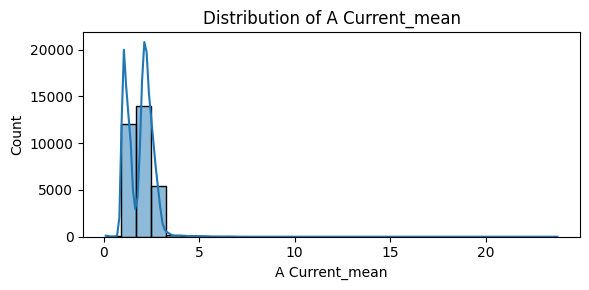

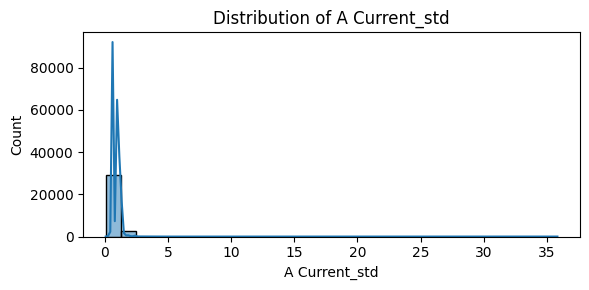

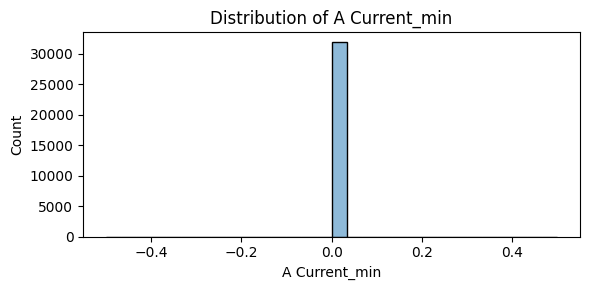

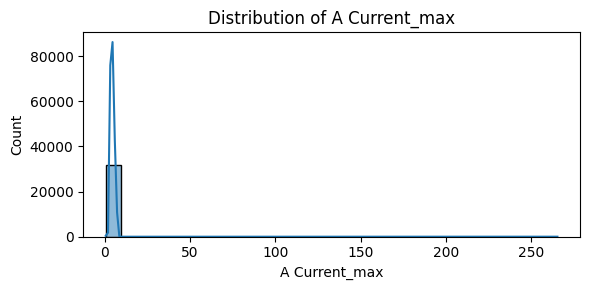

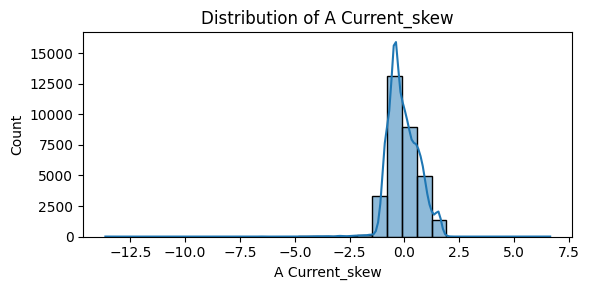

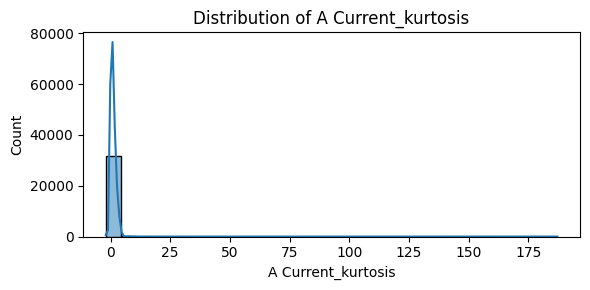

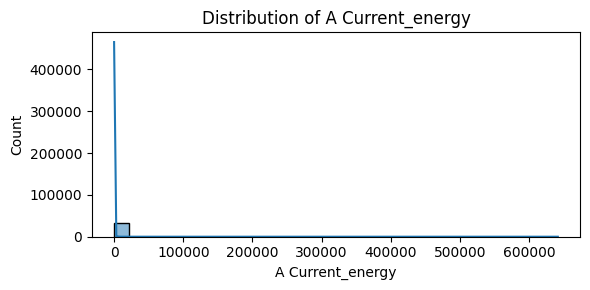

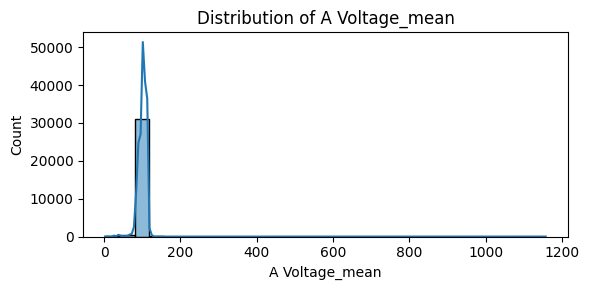

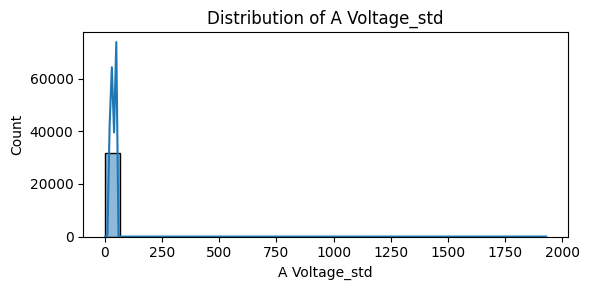

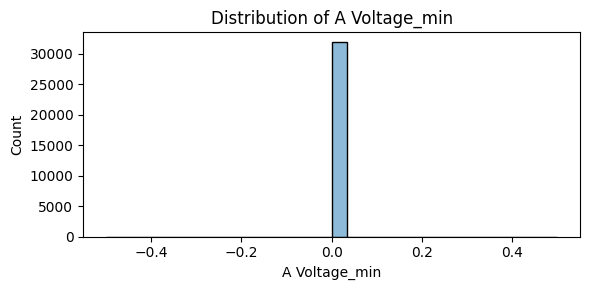

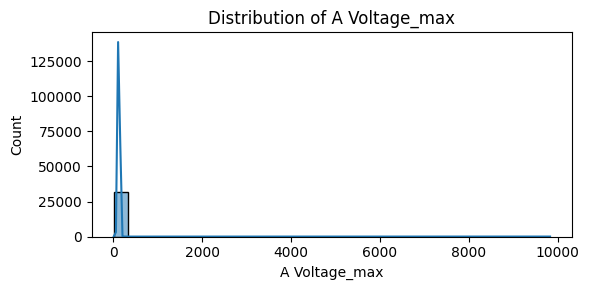

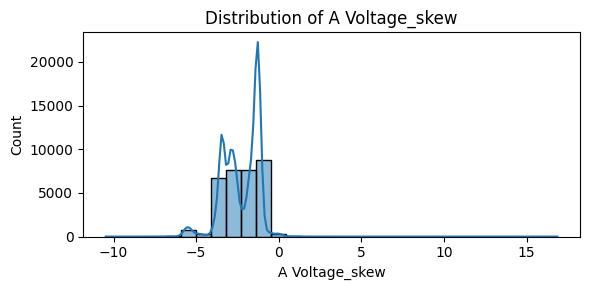

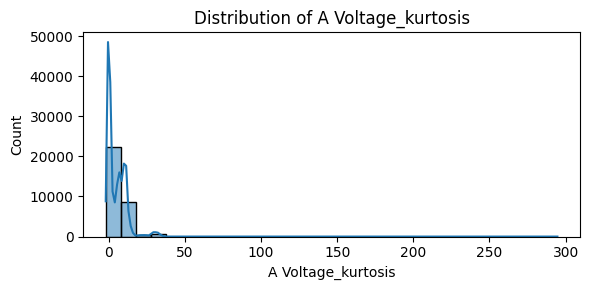

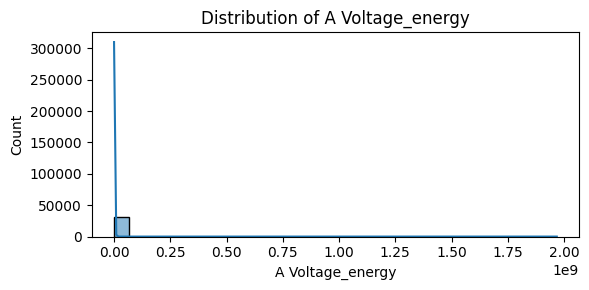

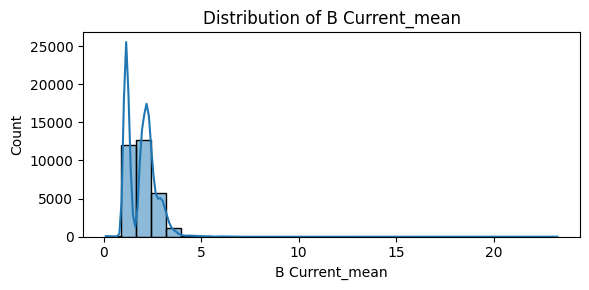

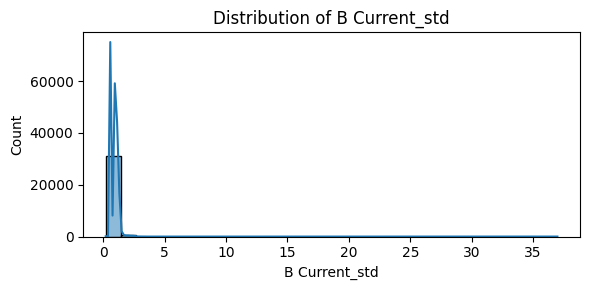

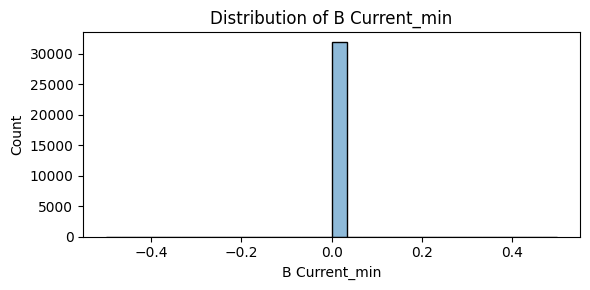

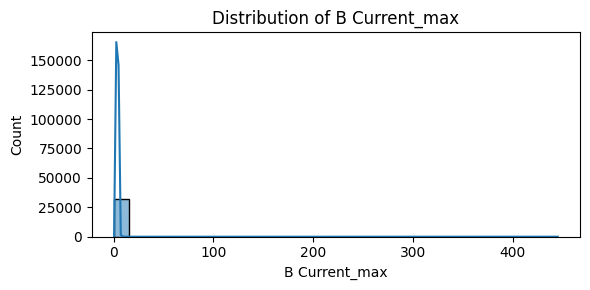

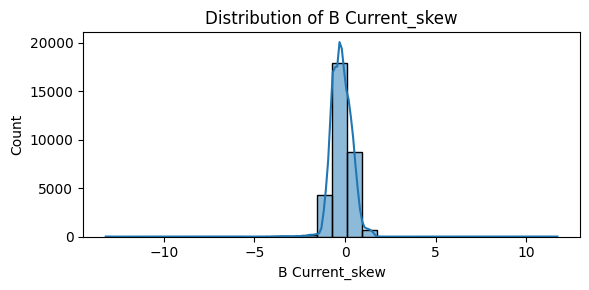

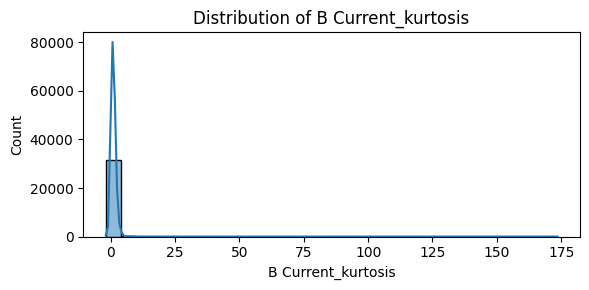

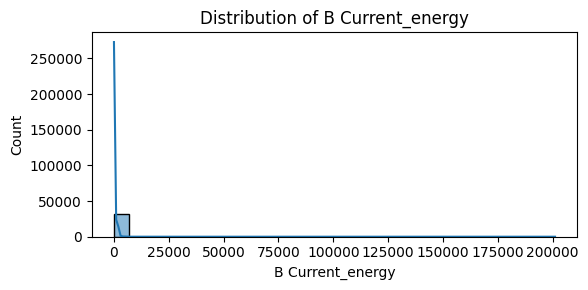

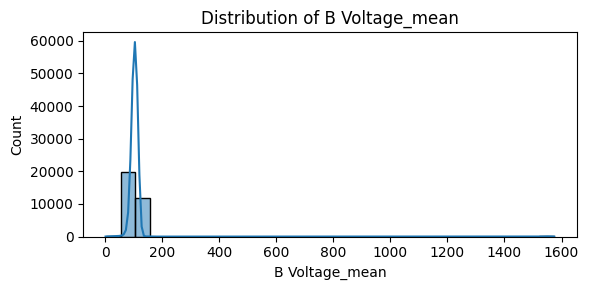

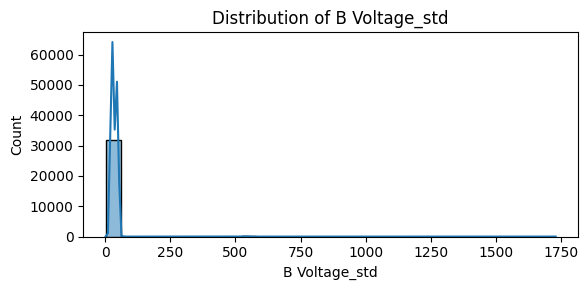

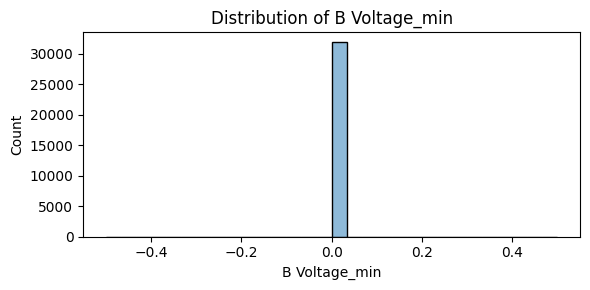

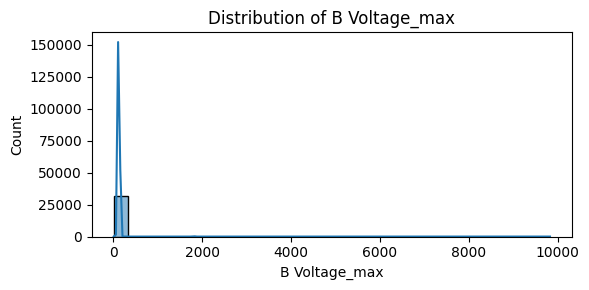

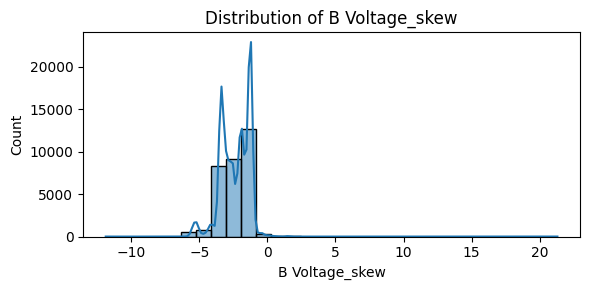

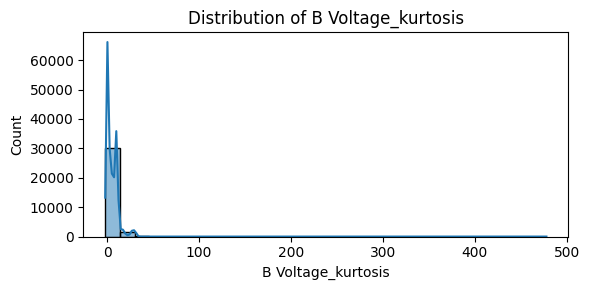

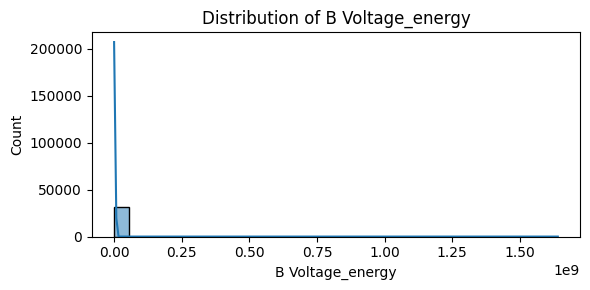

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_cols = feature_df_cleaned.select_dtypes(include=['float64', 'int64']).columns.tolist()
numeric_cols.remove('anomaly') if 'anomaly' in numeric_cols else None

for col in numeric_cols:
    plt.figure(figsize=(6, 3))
    sns.histplot(feature_df_cleaned[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()
    plt.show()


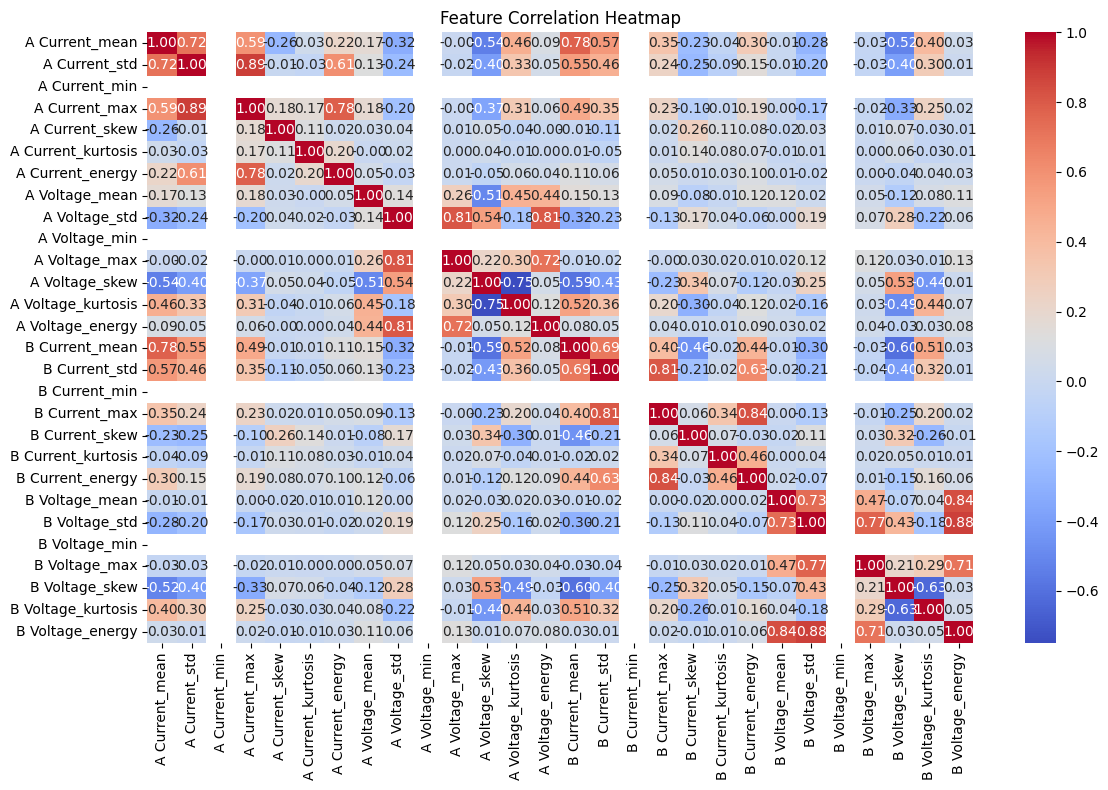

In [32]:
plt.figure(figsize=(12, 8))
corr = feature_df_cleaned[numeric_cols].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.tight_layout()
plt.show()


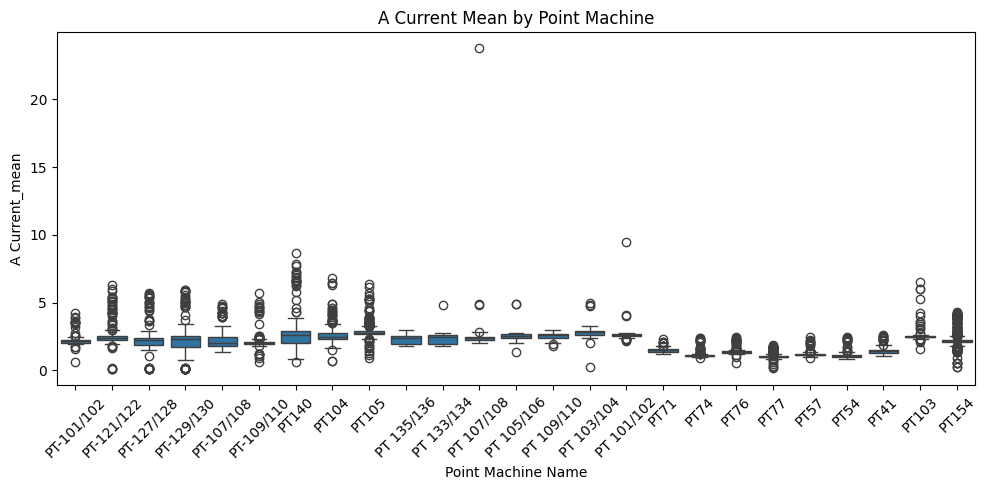

In [33]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=feature_df_cleaned, x='Point Machine Name', y='A Current_mean')
plt.title("A Current Mean by Point Machine")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


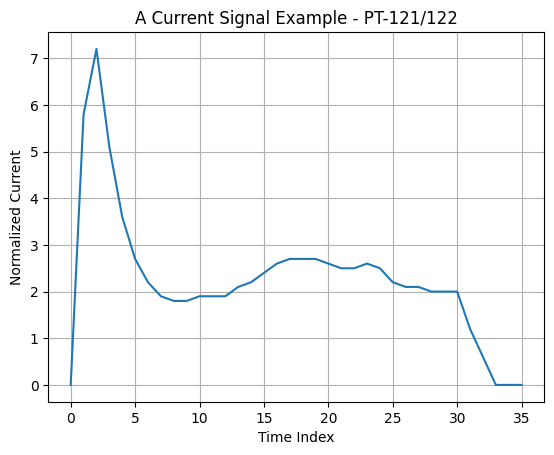

In [34]:
# Plot raw signal for a few machines and rows
sample = df[df['Point Machine Name'] == 'PT-121/122'].iloc[0]
plt.plot(sample['A Current'])
plt.title("A Current Signal Example - PT-121/122")
plt.xlabel("Time Index")
plt.ylabel("Normalized Current")
plt.grid(True)
plt.show()


In [36]:
# Step 1: Extract numeric features (but keep original DataFrame intact)
X = feature_df_cleaned.drop(columns=['Point Machine Name'])  # Keep rest of data

# Step 2: Train Isolation Forest
from sklearn.ensemble import IsolationForest

iso_forest = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)
feature_df_cleaned['anomaly'] = iso_forest.fit_predict(X)


/var/folders/5n/xzc0vnt56rvbflw_5ld8twv40000gn/T/ipykernel_25056/1360330644.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feature_df_cleaned['anomaly'] = iso_forest.fit_predict(X)


/Users/deepeshnavaneethakrishnan/Desktop/energy7/venv/lib/python3.9/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: divide by zero encountered in matmul
  X_transformed = X @ self.components_.T
/Users/deepeshnavaneethakrishnan/Desktop/energy7/venv/lib/python3.9/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: overflow encountered in matmul
  X_transformed = X @ self.components_.T
/Users/deepeshnavaneethakrishnan/Desktop/energy7/venv/lib/python3.9/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: invalid value encountered in matmul
  X_transformed = X @ self.components_.T


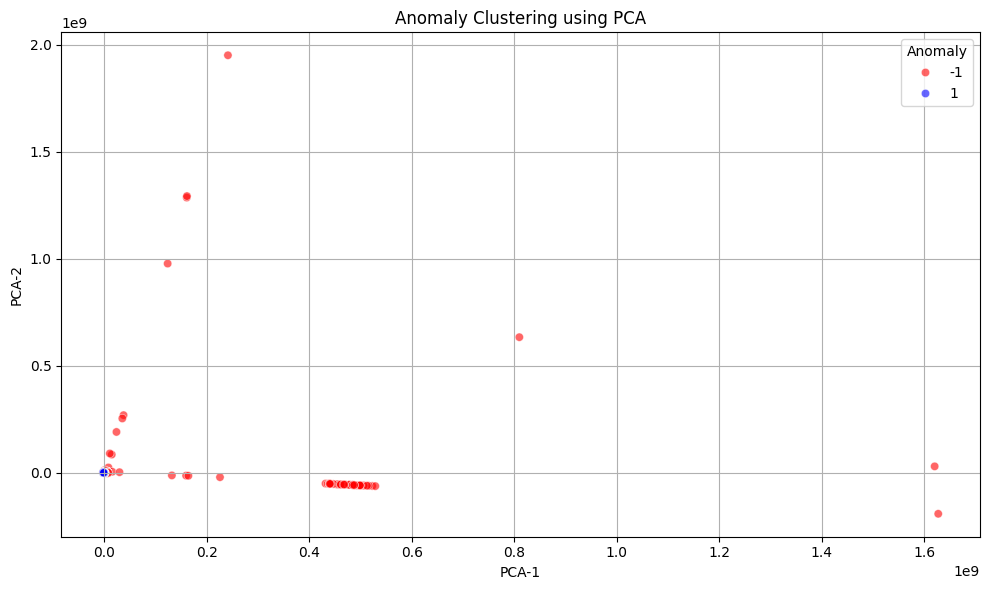

In [44]:
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Extract features (excluding anomaly and non-numeric columns)
X_features = feature_df_cleaned.select_dtypes(include=['float64', 'int64']).drop(columns=['anomaly'])

# Step 2: Apply PCA to reduce to 2D
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_features)

# Step 3: Create DataFrame for plotting
pca_df = pd.DataFrame(pca_result, columns=['PCA-1', 'PCA-2'])
pca_df['Anomaly'] = feature_df_cleaned['anomaly'].values
pca_df['Machine'] = feature_df_cleaned['Point Machine Name'].values  # optional

# Step 4: Plot PCA clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PCA-1', y='PCA-2', hue='Anomaly', palette={1: 'blue', -1: 'red'}, alpha=0.6)
plt.title('Anomaly Clustering using PCA')
plt.grid(True)
plt.tight_layout()
plt.show()


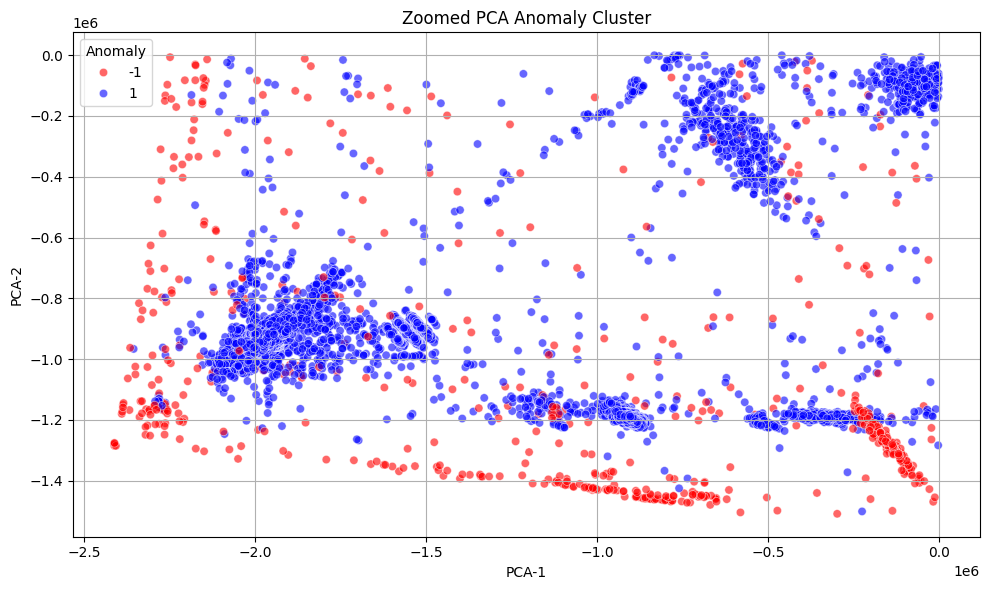

In [46]:
# Step 1: Define bounds to zoom (adjust as needed based on the plot)
pca_zoomed = pca_df[
    (pca_df['PCA-1'] > -1e7) & (pca_df['PCA-1'] < 1) &  # Adjust based on your scale
    (pca_df['PCA-2'] > -1e7) & (pca_df['PCA-2'] < 0.25)
]

# Step 2: Plot zoomed-in region
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_zoomed, x='PCA-1', y='PCA-2', hue='Anomaly',
                palette={1: 'blue', -1: 'red'}, alpha=0.6)
plt.title('Zoomed PCA Anomaly Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()


In [47]:
# Count anomalies per machine
machine_anomaly_counts = feature_df_cleaned.groupby('Point Machine Name')['anomaly'].value_counts().unstack().fillna(0)

# Optional: Add percentage of anomalies
machine_anomaly_counts['% Anomalous'] = (
    machine_anomaly_counts.get(-1, 0) / 
    (machine_anomaly_counts.get(-1, 0) + machine_anomaly_counts.get(1, 0)) * 100
)

print(machine_anomaly_counts.sort_values('% Anomalous', ascending=False))


anomaly              -1     1  % Anomalous
Point Machine Name                        
PT103               193   152    55.942029
PT 107/108           96    94    50.526316
PT 101/102           15    18    45.454545
PT 103/104           25    33    43.103448
PT 109/110           62    91    40.522876
PT-129/130          288   580    33.179724
PT 105/106            8    20    28.571429
PT 135/136           40   111    26.490066
PT 133/134           34   126    21.250000
PT140               177   797    18.172485
PT-127/128           48   358    11.822660
PT104               155  1269    10.884831
PT105               126  1485     7.821229
PT41                 10   303     3.194888
PT57                 54  1856     2.827225
PT-107/108           28  1061     2.571166
PT-101/102           13   498     2.544031
PT154               130  5193     2.442232
PT-121/122           40  3472     1.138952
PT-109/110           18  2933     0.609963
PT54                  5   850     0.584795
PT74       

In [48]:
from sklearn.preprocessing import StandardScaler

X = feature_df_cleaned.select_dtypes(include=['float64', 'int64']).drop(columns=['anomaly'])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [49]:
from sklearn.svm import OneClassSVM

svm = OneClassSVM(kernel='rbf', gamma='auto', nu=0.05)
svm_preds = svm.fit_predict(X_scaled)

feature_df_cleaned['svm_anomaly'] = svm_preds


/var/folders/5n/xzc0vnt56rvbflw_5ld8twv40000gn/T/ipykernel_25056/2904524833.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feature_df_cleaned['svm_anomaly'] = svm_preds


In [55]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import mean_squared_error
import numpy as np

# Define input size
input_dim = X_scaled.shape[1]

# Define model
autoencoder = Sequential([
    Dense(32, activation='relu', input_shape=(input_dim,)),
    Dense(16, activation='relu'),
    Dense(32, activation='relu'),
    Dense(input_dim, activation='linear')
])
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.fit(X_scaled, X_scaled, epochs=50, batch_size=32, verbose=0)

# Predict and compute reconstruction error
reconstructions = autoencoder.predict(X_scaled)
mse = np.mean(np.square(X_scaled - reconstructions), axis=1)

# Threshold using top 5% highest errors
threshold = np.percentile(mse, 95)

feature_df_cleaned['ae_anomaly'] = pd.Series((mse > threshold).astype(int)).replace({1: -1, 0: 1})



/Users/deepeshnavaneethakrishnan/Desktop/energy7/venv/lib/python3.9/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


997/997 ━━━━━━━━━━━━━━━━━━━━ 0s 195us/step


/var/folders/5n/xzc0vnt56rvbflw_5ld8twv40000gn/T/ipykernel_25056/322701490.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feature_df_cleaned['ae_anomaly'] = pd.Series((mse > threshold).astype(int)).replace({1: -1, 0: 1})


In [53]:
from sklearn.neighbors import LocalOutlierFactor

lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
lof_preds = lof.fit_predict(X_scaled)

feature_df_cleaned['lof_anomaly'] = lof_preds


/var/folders/5n/xzc0vnt56rvbflw_5ld8twv40000gn/T/ipykernel_25056/3428300434.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feature_df_cleaned['lof_anomaly'] = lof_preds


In [56]:
compare = feature_df_cleaned[['anomaly', 'svm_anomaly', 'ae_anomaly', 'lof_anomaly']]
print(compare.value_counts())


anomaly  svm_anomaly  ae_anomaly  lof_anomaly
 1        1            1.0         1             27316
                      -1.0         1              1281
                       1.0        -1              1031
-1       -1            1.0         1               753
          1            1.0         1               360
 1       -1            1.0         1               356
-1       -1            1.0        -1               222
 1       -1            1.0        -1               108
          1           -1.0        -1                99
-1        1            1.0        -1                93
         -1           -1.0         1                90
          1           -1.0         1                40
 1       -1           -1.0         1                33
-1       -1           -1.0        -1                29
          1           -1.0        -1                 8
 1       -1           -1.0        -1                 5
Name: count, dtype: int64


In [57]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Reduce features to 2D for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Add PCA result to dataframe
feature_df_cleaned['PCA-1'] = X_pca[:, 0]
feature_df_cleaned['PCA-2'] = X_pca[:, 1]


/Users/deepeshnavaneethakrishnan/Desktop/energy7/venv/lib/python3.9/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: divide by zero encountered in matmul
  X_transformed = X @ self.components_.T
/Users/deepeshnavaneethakrishnan/Desktop/energy7/venv/lib/python3.9/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: overflow encountered in matmul
  X_transformed = X @ self.components_.T
/Users/deepeshnavaneethakrishnan/Desktop/energy7/venv/lib/python3.9/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: invalid value encountered in matmul
  X_transformed = X @ self.components_.T
/var/folders/5n/xzc0vnt56rvbflw_5ld8twv40000gn/T/ipykernel_25056/84711051.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  

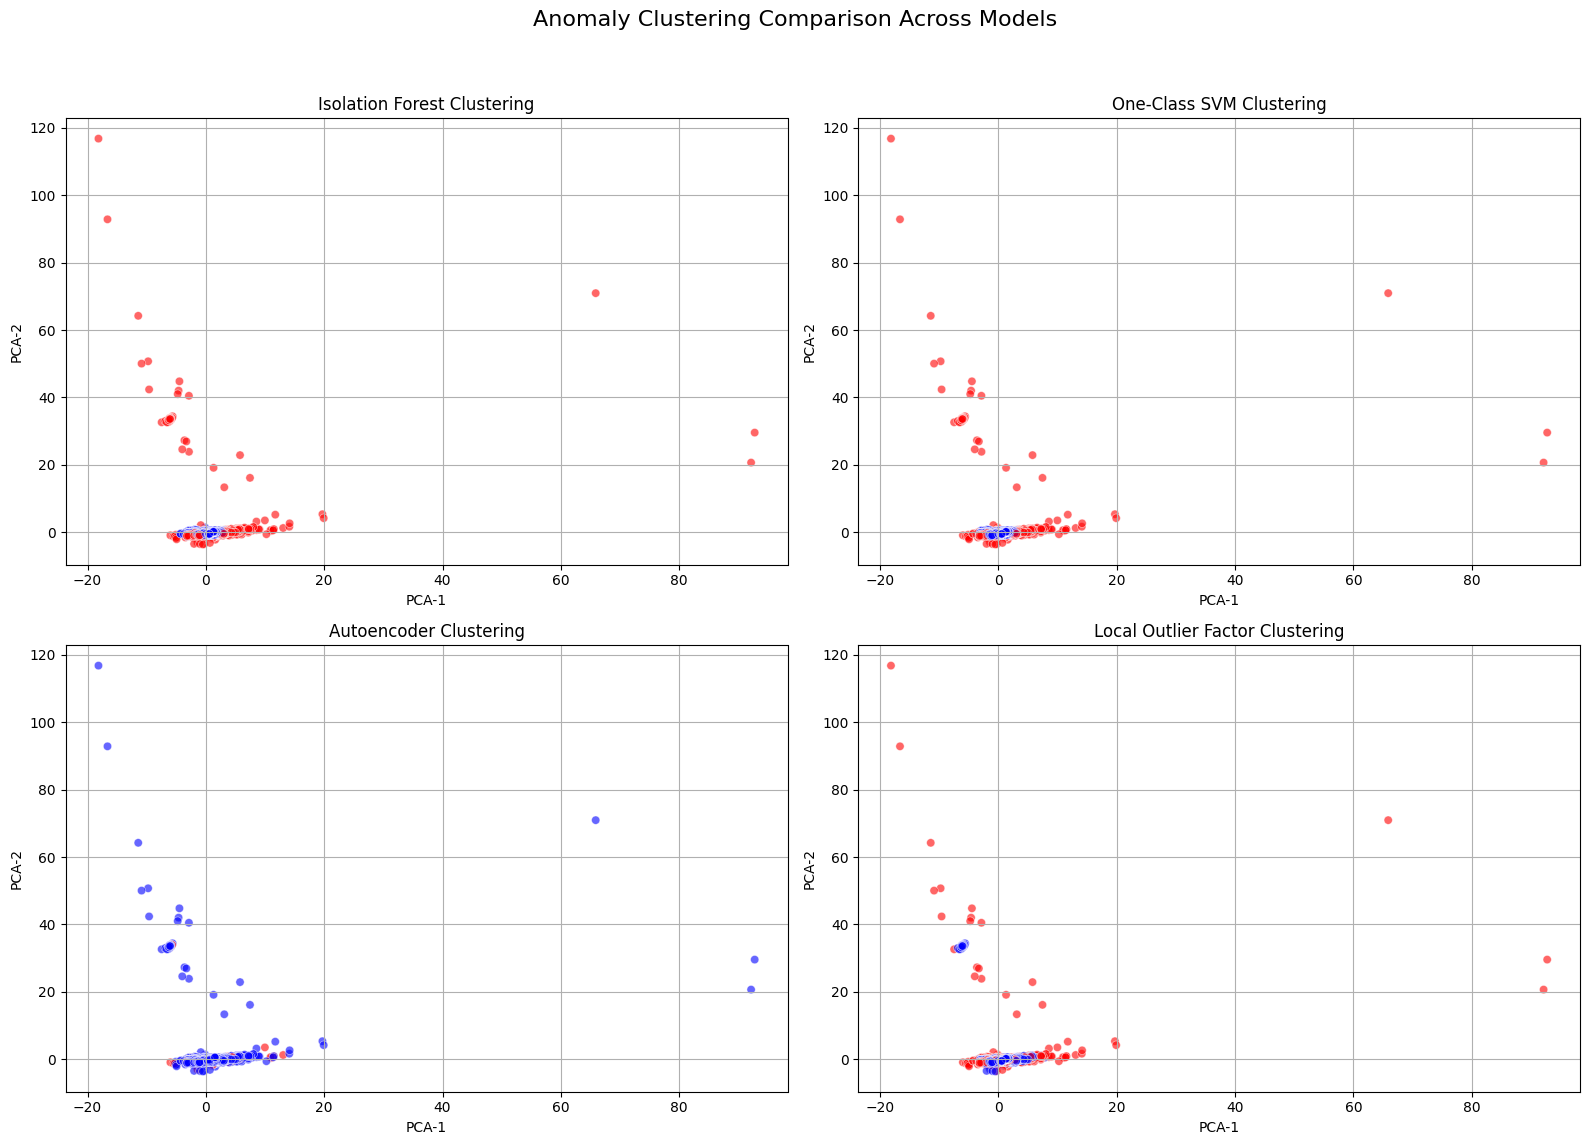

In [64]:
models = {
    'Isolation Forest': 'anomaly',
    'One-Class SVM': 'svm_anomaly',
    'Autoencoder': 'ae_anomaly',
    'Local Outlier Factor': 'lof_anomaly'
}

plt.figure(figsize=(16, 12))

for i, (title, col) in enumerate(models.items(), 1):
    plt.subplot(2, 2, i)
    sns.scatterplot(data=feature_df_cleaned, x='PCA-1', y='PCA-2', hue=col,
                    palette={1: 'blue', -1: 'red'}, alpha=0.6, legend=False)
    plt.title(f"{title} Clustering")
    plt.grid(True)

plt.suptitle("Anomaly Clustering Comparison Across Models", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


/var/folders/5n/xzc0vnt56rvbflw_5ld8twv40000gn/T/ipykernel_25056/2815447286.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pca_zoomed[f'{col}_label'] = pca_zoomed[col].map(label_map)  # new column
/var/folders/5n/xzc0vnt56rvbflw_5ld8twv40000gn/T/ipykernel_25056/2815447286.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pca_zoomed[f'{col}_label'] = pca_zoomed[col].map(label_map)  # new column
/var/folders/5n/xzc0vnt56rvbflw_5ld8twv40000gn/T/ipykernel_25056/2815447286.py:27: SettingWithCopyWarning:

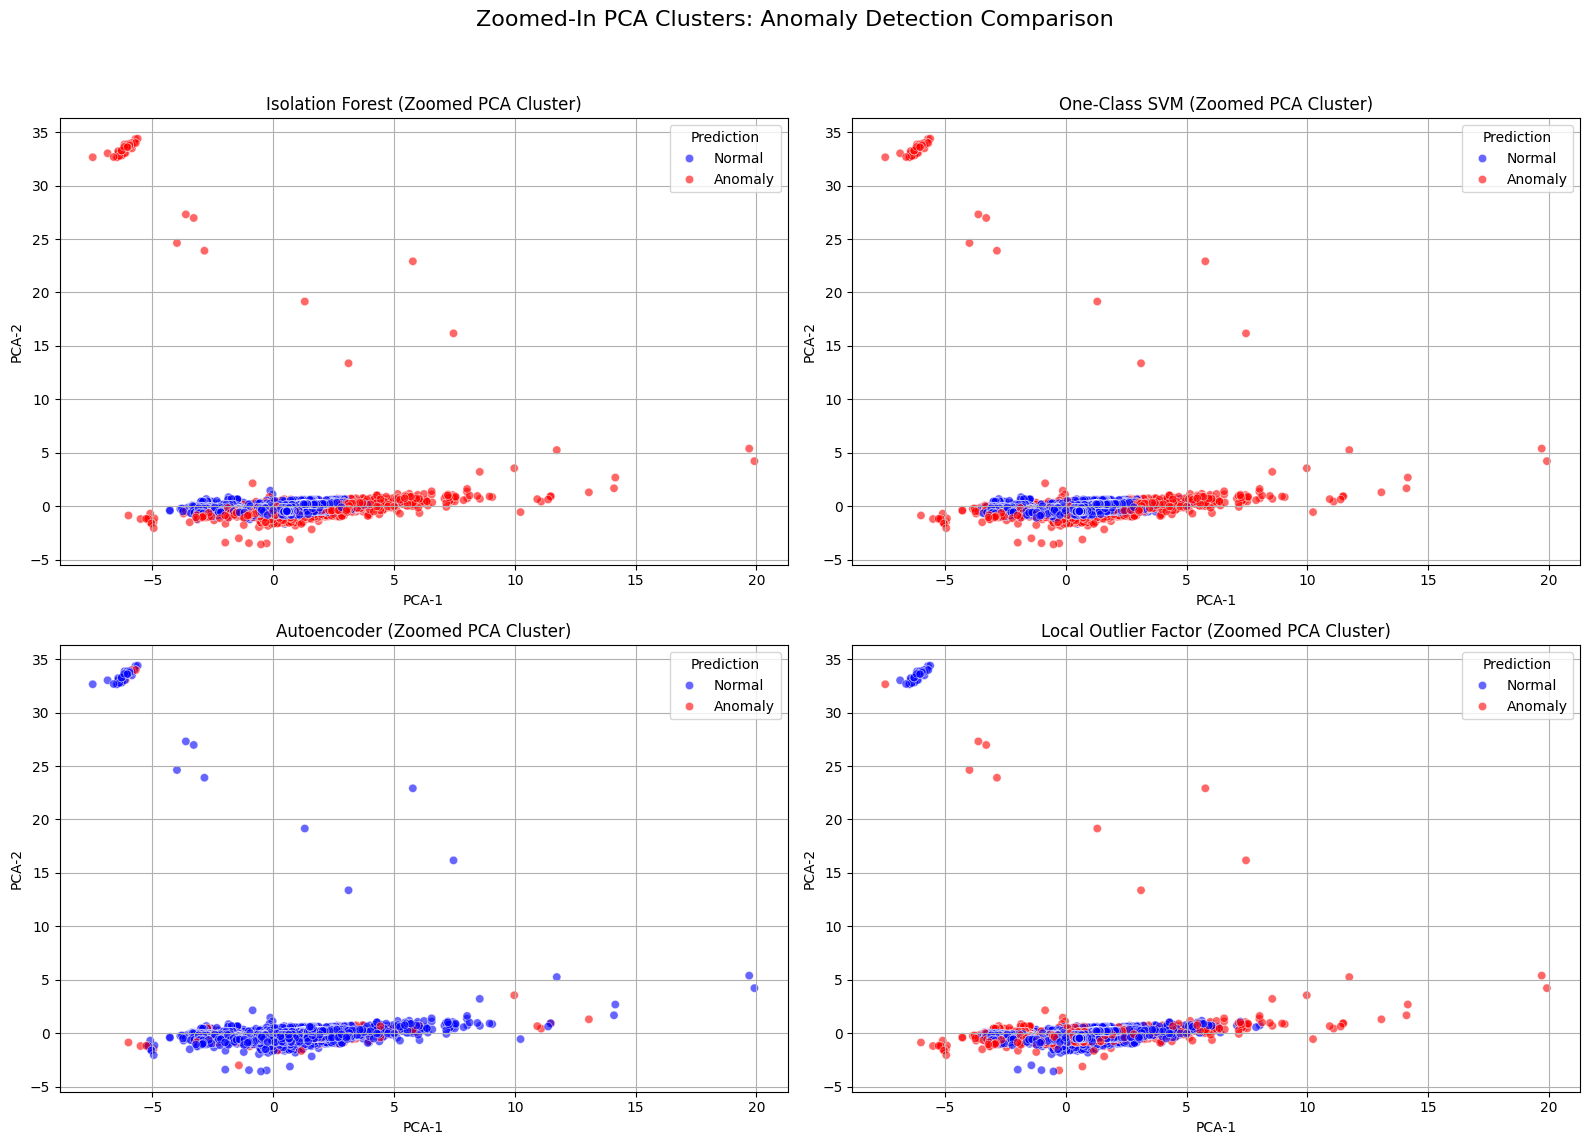

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Define zoom bounds
pca_zoomed = feature_df_cleaned[
    (feature_df_cleaned['PCA-1'] > -1e7) & (feature_df_cleaned['PCA-1'] < 20) &
    (feature_df_cleaned['PCA-2'] > -1e7) & (feature_df_cleaned['PCA-2'] < 40)
]

# Step 2: Model result columns and legend labels
models = {
    'Isolation Forest': 'anomaly',
    'One-Class SVM': 'svm_anomaly',
    'Autoencoder': 'ae_anomaly',
    'Local Outlier Factor': 'lof_anomaly'
}

# Use string labels for mapping
label_map = {1: 'Normal', -1: 'Anomaly'}
palette = {'Normal': 'blue', 'Anomaly': 'red'}

# Step 3: Plot each model's predictions with labeled legend
plt.figure(figsize=(16, 12))

for i, (title, col) in enumerate(models.items(), 1):
    plt.subplot(2, 2, i)
    pca_zoomed[f'{col}_label'] = pca_zoomed[col].map(label_map)  # new column
    sns.scatterplot(
        data=pca_zoomed,
        x='PCA-1', y='PCA-2',
        hue=f'{col}_label',
        palette=palette,
        alpha=0.6
    )
    plt.title(f"{title} (Zoomed PCA Cluster)")
    plt.grid(True)
    plt.legend(title="Prediction", loc='best')

plt.suptitle("Zoomed-In PCA Clusters: Anomaly Detection Comparison", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
